In [ ]:
! pip install d2l==1.0.0b0

In [ ]:
import torch
import torchvision
from torch import nn
from torchvision import transforms

In [ ]:
# Define how we want images transformed
resize = (32, 32)
trans = transforms.Compose([transforms.Resize(resize),
                            transforms.ToTensor()])

# Create training and validation sets
training_set = torchvision.datasets.FashionMNIST('./data', train=True, 
                                                 transform=trans, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, 
                                                   transform=trans, download=True)

# Create dataloaders for each set
training_loader = torch.utils.data.DataLoader(training_set, batch_size=32, 
                                              shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=32, 
                                                shuffle=False, num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


Sneaker  Bag  Sneaker  Pullover  T-shirt/top  Pullover  Bag  T-shirt/top  Ankle Boot  Ankle Boot


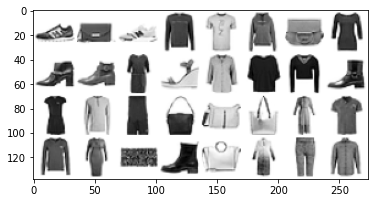

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(10)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Create Multilayer Perceptron class
class MLP(nn.Module):
    def __init__(self, num_hiddens_1, num_hiddens_2, num_hiddens_3, num_outputs, lr):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens_1), nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens_2), nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens_3), nn.ReLU(), 
                                 nn.LazyLinear(num_outputs))
        
    def forward(self, x):
        x = self.net(x)
        return x

# Create MLP instance
model = MLP(num_hiddens_1 = 128, num_hiddens_2 = 64, num_hiddens_3 = 32, num_outputs = 10, lr = 0.01)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# Define training and validation loops for each epoch

def train_loop(dataloader, model, loss_fn, optimizer):

    running_loss = 0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch % 1000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    
    epoch_loss = running_loss / len(dataloader)
    losses.append(epoch_loss)
    

def val_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    val_loss, correct = 0, 0

 
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            val_loss += loss_fn(pred, y).item()      
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()


    val_loss /= num_batches
    valLosses.append(val_loss)
    correct /= size
    valHist.append(correct)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {val_loss:>8f} \n")

In [ ]:
# Begin training over 20 epochs
epochs = 20
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, model, criterion, optimizer)
    val_loop(validation_loader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.307498  [    0/60000]
loss: 1.288160  [32000/60000]
Test Error: 
 Accuracy: 70.0%, Avg loss: 0.788937 

Epoch 2
-------------------------------
loss: 1.047958  [    0/60000]
loss: 0.630429  [32000/60000]
Test Error: 
 Accuracy: 75.5%, Avg loss: 0.659525 

Epoch 3
-------------------------------
loss: 0.619903  [    0/60000]
loss: 0.545630  [32000/60000]
Test Error: 
 Accuracy: 80.9%, Avg loss: 0.538922 

Epoch 4
-------------------------------
loss: 0.735742  [    0/60000]
loss: 0.642146  [32000/60000]
Test Error: 
 Accuracy: 82.2%, Avg loss: 0.498401 

Epoch 5
-------------------------------
loss: 0.503792  [    0/60000]
loss: 0.545548  [32000/60000]
Test Error: 
 Accuracy: 83.1%, Avg loss: 0.469833 

Epoch 6
-------------------------------
loss: 0.494981  [    0/60000]
loss: 0.517375  [32000/60000]
Test Error: 
 Accuracy: 83.4%, Avg loss: 0.464789 

Epoch 7
-------------------------------
loss: 0.347607  [    0/60000]
loss: 0.364581  [3

In [ ]:
print(losses)
print(valLosses)

[1.389205991299947, 0.6646710595687231, 0.557546475704511, 0.502343945590655, 0.46960794189771016, 0.44451473484834036, 0.4225469404021899, 0.40536702437798183, 0.39008898814320564, 0.376864779484272, 0.36597027623256045, 0.3561354979674021, 0.34695657138029734, 0.3381335653821627, 0.33174969658056896, 0.3240614756544431, 0.3183030350704988, 0.3122368401368459, 0.3070016199489435, 0.3012521358013153]
[0.7889368714996801, 0.6595247334565598, 0.5389223094946279, 0.49840050921462975, 0.469832766265534, 0.46478930786966133, 0.44391806685505586, 0.43037177005800575, 0.4073260910928059, 0.41960566819380646, 0.3996535911441992, 0.38156540077715256, 0.3721828661835232, 0.3735328902023288, 0.36928161271749593, 0.3602106032518152, 0.36333581500540907, 0.35853542968297536, 0.3537627589731171, 0.366463973463629]


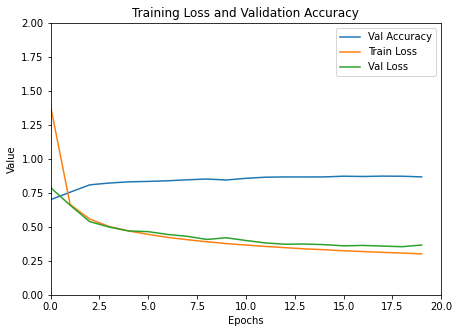

In [ ]:
# Plot results
plt.figure(figsize=(7,5))
plt.title("Training Loss and Validation Accuracy")
plt.plot(valHist,label="Val Accuracy")
plt.plot(losses,label="Train Loss")
plt.plot(valLosses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.xlim(0,epochs)
plt.ylim(0,2)
plt.show()

# Using Pre-trained Model

In [ ]:
torch.save(model.state_dict(), 'baseModel.params')

clone = MLP(num_hiddens_1 = 128, num_hiddens_2 = 64, num_hiddens_3 = 32, num_outputs = 10, lr = 0.01)
clone.load_state_dict(torch.load('baseModel.params'))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clone.parameters(), lr=0.01)

clone.eval()

MLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): LazyLinear(in_features=0, out_features=128, bias=True)
    (2): ReLU()
    (3): LazyLinear(in_features=0, out_features=64, bias=True)
    (4): ReLU()
    (5): LazyLinear(in_features=0, out_features=32, bias=True)
    (6): ReLU()
    (7): LazyLinear(in_features=0, out_features=10, bias=True)
  )
)

In [ ]:
epochs = 5
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, clone, criterion, optimizer)
    val_loop(validation_loader, clone, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 0.375544  [    0/60000]
loss: 0.372084  [32000/60000]
Test Error: 
 Accuracy: 87.2%, Avg loss: 0.372636 

Epoch 2
-------------------------------
loss: 0.308727  [    0/60000]
loss: 0.288632  [32000/60000]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.345828 

Epoch 3
-------------------------------
loss: 0.248311  [    0/60000]
loss: 0.188028  [32000/60000]
Test Error: 
 Accuracy: 86.6%, Avg loss: 0.376978 

Epoch 4
-------------------------------
loss: 0.303547  [    0/60000]
loss: 0.260533  [32000/60000]
Test Error: 
 Accuracy: 85.9%, Avg loss: 0.376529 

Epoch 5
-------------------------------
loss: 0.418085  [    0/60000]
loss: 0.259463  [32000/60000]
Test Error: 
 Accuracy: 87.1%, Avg loss: 0.356503 

Done!


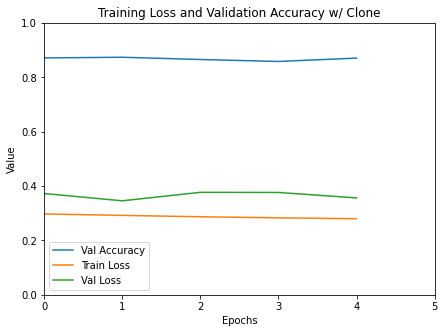

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Training Loss and Validation Accuracy w/ Clone")
plt.plot(valHist,label="Val Accuracy")
plt.plot(losses,label="Train Loss")
plt.plot(valLosses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.xlim(0,epochs)
plt.ylim(0,1)
plt.show()

# Adding Weight Decay


In [ ]:
decayModel = MLP(num_hiddens_1 = 128, num_hiddens_2 = 64, num_hiddens_3 = 32, num_outputs = 10, lr = 0.01)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(decayModel.parameters(), lr=0.01, weight_decay=0.001)

In [ ]:
epochs = 20
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, decayModel, criterion, optimizer)
    val_loop(validation_loader, decayModel, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.280866  [    0/60000]
loss: 1.100908  [32000/60000]
Test Error: 
 Accuracy: 71.2%, Avg loss: 0.764101 

Epoch 2
-------------------------------
loss: 0.700288  [    0/60000]
loss: 0.577926  [32000/60000]
Test Error: 
 Accuracy: 78.1%, Avg loss: 0.620857 

Epoch 3
-------------------------------
loss: 0.685537  [    0/60000]
loss: 0.513685  [32000/60000]
Test Error: 
 Accuracy: 79.8%, Avg loss: 0.564055 

Epoch 4
-------------------------------
loss: 0.484304  [    0/60000]
loss: 0.667719  [32000/60000]
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.545630 

Epoch 5
-------------------------------
loss: 0.480254  [    0/60000]
loss: 0.449868  [32000/60000]
Test Error: 
 Accuracy: 81.6%, Avg loss: 0.514126 

Epoch 6
-------------------------------
loss: 0.291720  [    0/60000]
loss: 0.469821  [32000/60000]
Test Error: 
 Accuracy: 80.5%, Avg loss: 0.516796 

Epoch 7
-------------------------------
loss: 0.385057  [    0/60000]
loss: 0.305167  [3

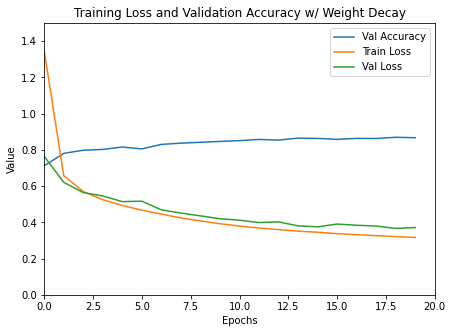

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Training Loss and Validation Accuracy w/ Weight Decay")
plt.plot(valHist,label="Val Accuracy")
plt.plot(losses,label="Train Loss")
plt.plot(valLosses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.xlim(0, epochs)
plt.ylim(0,1.5)
plt.show()

# Using Pre-trained Model

In [ ]:
# Using pre-trained model
torch.save(decayModel.state_dict(), 'decayModel.params')

cloneDecay = MLP(num_hiddens_1 = 128, num_hiddens_2 = 64, num_hiddens_3 = 32, num_outputs = 10, lr = 0.01)
cloneDecay.load_state_dict(torch.load('decayModel.params'))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cloneDecay.parameters(), lr=0.01, weight_decay=0.001)

cloneDecay.eval()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


MLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): LazyLinear(in_features=0, out_features=128, bias=True)
    (2): ReLU()
    (3): LazyLinear(in_features=0, out_features=64, bias=True)
    (4): ReLU()
    (5): LazyLinear(in_features=0, out_features=32, bias=True)
    (6): ReLU()
    (7): LazyLinear(in_features=0, out_features=10, bias=True)
  )
)

In [ ]:
epochs = 5
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, cloneDecay, criterion, optimizer)
    val_loop(validation_loader, cloneDecay, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 0.312303  [    0/60000]
loss: 0.470392  [32000/60000]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.372257 

Epoch 2
-------------------------------
loss: 0.394709  [    0/60000]
loss: 0.624367  [32000/60000]
Test Error: 
 Accuracy: 86.2%, Avg loss: 0.372261 

Epoch 3
-------------------------------
loss: 0.274564  [    0/60000]
loss: 0.327371  [32000/60000]
Test Error: 
 Accuracy: 86.7%, Avg loss: 0.365596 

Epoch 4
-------------------------------
loss: 0.438620  [    0/60000]
loss: 0.140048  [32000/60000]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.351841 

Epoch 5
-------------------------------
loss: 0.464054  [    0/60000]
loss: 0.191313  [32000/60000]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.349370 

Done!


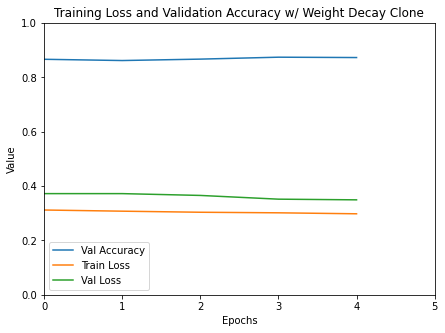

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Training Loss and Validation Accuracy w/ Weight Decay Clone")
plt.plot(valHist,label="Val Accuracy")
plt.plot(losses,label="Train Loss")
plt.plot(valLosses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.xlim(0, epochs)
plt.ylim(0,1)
plt.show()

# Adding Dropout Layers

In [ ]:
class DropoutMLP(nn.Module):
    def __init__(self, num_hiddens_1, num_hiddens_2, num_hiddens_3, num_outputs, 
                 dropout_1, dropout_2, dropout_3, lr):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens_1), nn.ReLU(), nn.Dropout(dropout_1),
                                 nn.LazyLinear(num_hiddens_2), nn.ReLU(), nn.Dropout(dropout_2),
                                 nn.LazyLinear(num_hiddens_3), nn.ReLU(), nn.Dropout(dropout_3),
                                 nn.LazyLinear(num_outputs))
        
    def forward(self, x):
        x = self.net(x)
        return x

In [ ]:
dropModel = DropoutMLP(num_hiddens_1 = 128, num_hiddens_2 = 64, num_hiddens_3 = 32, num_outputs = 10, 
                       dropout_1 = 0.3, dropout_2 = 0.3, dropout_3 = 0.3, lr = 0.01)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(dropModel.parameters(), lr=0.01)

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
epochs = 20
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, dropModel, criterion, optimizer)
    val_loop(validation_loader, dropModel, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297230  [    0/60000]
loss: 1.545985  [32000/60000]
Test Error: 
 Accuracy: 53.6%, Avg loss: 1.144401 

Epoch 2
-------------------------------
loss: 1.244859  [    0/60000]
loss: 0.974569  [32000/60000]
Test Error: 
 Accuracy: 63.9%, Avg loss: 0.904053 

Epoch 3
-------------------------------
loss: 0.985021  [    0/60000]
loss: 0.711120  [32000/60000]
Test Error: 
 Accuracy: 70.4%, Avg loss: 0.792662 

Epoch 4
-------------------------------
loss: 0.869264  [    0/60000]
loss: 0.601540  [32000/60000]
Test Error: 
 Accuracy: 73.2%, Avg loss: 0.729366 

Epoch 5
-------------------------------
loss: 0.539139  [    0/60000]
loss: 0.986598  [32000/60000]
Test Error: 
 Accuracy: 75.5%, Avg loss: 0.676970 

Epoch 6
-------------------------------
loss: 0.467048  [    0/60000]
loss: 0.475717  [32000/60000]
Test Error: 
 Accuracy: 76.6%, Avg loss: 0.640451 

Epoch 7
-------------------------------
loss: 0.782185  [    0/60000]
loss: 0.614591  [3

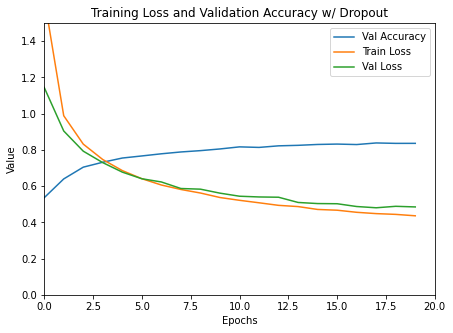

In [29]:
plt.figure(figsize=(7,5))
plt.title("Training Loss and Validation Accuracy w/ Dropout")
plt.plot(valHist,label="Val Accuracy")
plt.plot(losses,label="Train Loss")
plt.plot(valLosses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.xlim(0, epochs)
plt.ylim(0,1.5)
plt.show()

# Using Pre-trained Model

In [30]:
# Using pre-trained model
torch.save(dropModel.state_dict(), 'dropModel.params')

cloneDropout = DropoutMLP(num_hiddens_1 = 128, num_hiddens_2 = 64, num_hiddens_3 = 32, num_outputs = 10, 
                       dropout_1 = 0.3, dropout_2 = 0.3, dropout_3 = 0.3, lr = 0.01)
cloneDropout.load_state_dict(torch.load('dropModel.params'))

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cloneDropout.parameters(), lr=0.01)

cloneDropout.eval()

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


DropoutMLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): LazyLinear(in_features=0, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): LazyLinear(in_features=0, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.3, inplace=False)
    (7): LazyLinear(in_features=0, out_features=32, bias=True)
    (8): ReLU()
    (9): Dropout(p=0.3, inplace=False)
    (10): LazyLinear(in_features=0, out_features=10, bias=True)
  )
)

In [31]:
epochs = 5
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(training_loader, cloneDropout, criterion, optimizer)
    val_loop(validation_loader, cloneDropout, criterion)
print("Done!")

Epoch 1
-------------------------------
loss: 0.217913  [    0/60000]
loss: 0.248530  [32000/60000]
Test Error: 
 Accuracy: 86.9%, Avg loss: 0.364434 

Epoch 2
-------------------------------
loss: 0.254765  [    0/60000]
loss: 0.261679  [32000/60000]
Test Error: 
 Accuracy: 86.8%, Avg loss: 0.364832 

Epoch 3
-------------------------------
loss: 0.193656  [    0/60000]
loss: 0.423570  [32000/60000]
Test Error: 
 Accuracy: 86.9%, Avg loss: 0.358892 

Epoch 4
-------------------------------
loss: 0.160630  [    0/60000]
loss: 0.121018  [32000/60000]
Test Error: 
 Accuracy: 87.3%, Avg loss: 0.354414 

Epoch 5
-------------------------------
loss: 0.464963  [    0/60000]
loss: 0.277565  [32000/60000]
Test Error: 
 Accuracy: 87.4%, Avg loss: 0.351269 

Done!


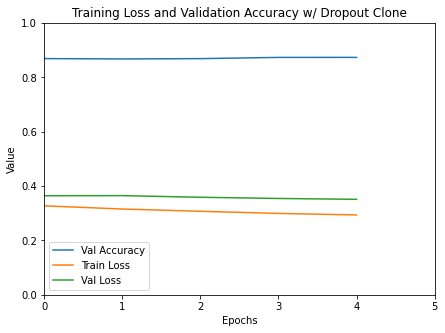

In [32]:
plt.figure(figsize=(7,5))
plt.title("Training Loss and Validation Accuracy w/ Dropout Clone")
plt.plot(valHist,label="Val Accuracy")
plt.plot(losses,label="Train Loss")
plt.plot(valLosses,label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Value")
plt.legend()
plt.xlim(0, epochs)
plt.ylim(0,1)
plt.show()

# Kaggle Housing Dataset

In [ ]:
%matplotlib inline
import pandas as pd
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
class KaggleHouse(d2l.DataModule):
    def __init__(self, batch_size, train=None, val=None):
        super().__init__()
        self.save_hyperparameters()
        if self.train is None:
            self.raw_train = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_train.csv', self.root,
                sha1_hash='585e9cc93e70b39160e7921475f9bcd7d31219ce'))
            self.raw_val = pd.read_csv(d2l.download(
                d2l.DATA_URL + 'kaggle_house_pred_test.csv', self.root,
                sha1_hash='fa19780a7b011d9b009e8bff8e99922a8ee2eb90'))

In [ ]:
data = KaggleHouse(batch_size=64)
print(data.raw_train.shape)
print(data.raw_val.shape)

(1460, 81)
(1459, 80)


In [ ]:
print(data.raw_train.iloc[:4, [0, 1, 2, 3, -3, -2, -1]])

   Id  MSSubClass MSZoning  LotFrontage SaleType SaleCondition  SalePrice
0   1          60       RL         65.0       WD        Normal     208500
1   2          20       RL         80.0       WD        Normal     181500
2   3          60       RL         68.0       WD        Normal     223500
3   4          70       RL         60.0       WD       Abnorml     140000


In [ ]:
@d2l.add_to_class(KaggleHouse)
def preprocess(self):
    # Remove the ID and label columns
    label = 'SalePrice'
    features = pd.concat(
        (self.raw_train.drop(columns=['Id', label]),
         self.raw_val.drop(columns=['Id'])))
    # Standardize numerical columns
    numeric_features = features.dtypes[features.dtypes != 'object'].index
    features[numeric_features] = features[numeric_features].apply(
        lambda x: (x - x.mean()) / (x.std()))
    # Replace NAN numerical features by 0
    features[numeric_features] = features[numeric_features].fillna(0)
    # Replace discrete features by one-hot encoding.
    features = pd.get_dummies(features, dummy_na=True)
    # Save preprocessed features
    self.train = features[:self.raw_train.shape[0]].copy()
    self.train[label] = self.raw_train[label]
    self.val = features[self.raw_train.shape[0]:].copy()

In [ ]:
data.preprocess()
print(data.train.shape)
print(data.val.shape)
# We now have our preprocessed data

(1460, 332)
(1459, 331)


In [ ]:
import numpy as np
from torch.utils.data import Dataset

# Define custom dataset class
class CustomCSVDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = csv_file #pd.read_csv(csv_file)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        feature = self.data.iloc[idx, :-1].values
        label = self.data.iloc[idx, -1]

        if self.transform:
            feature = self.transform(feature)

        feature = np.array(feature)
        feature = torch.Tensor(feature)
        
        label = torch.from_numpy(np.array(label, dtype=np.float32))
        label = torch.unsqueeze(label, dim=0)

        sample = [feature, label]

        return sample

In [ ]:
type(data.train)

pandas.core.frame.DataFrame

In [ ]:
# Create datasets
houseTrain = CustomCSVDataset(data.train)
houseVal = CustomCSVDataset(data.val)

# Create dataloaders
houseTrainLoader = torch.utils.data.DataLoader(houseTrain, batch_size=64, 
                                              shuffle=True, num_workers=0)

houseValLoader = torch.utils.data.DataLoader(houseVal, batch_size=64, 
                                              shuffle=False, num_workers=0)


In [ ]:
# Define linear regression pricing model
class HousePricer(nn.Module):
    def __init__(self, num_hiddens_1, num_hiddens_2, num_hiddens_3, num_hiddens_4, lr):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens_1), nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens_2), nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens_3), nn.ReLU(), 
                                 nn.LazyLinear(num_hiddens_4), nn.ReLU(), 
                                 nn.LazyLinear(1))
        
    def forward(self, x):
        x = self.net(x)
        return x


In [ ]:
# Create HousePricer instance
priceModel = HousePricer(num_hiddens_1 = 256, num_hiddens_2 = 128, num_hiddens_3 = 64, num_hiddens_4 = 32, lr = 0.01)
criterion = nn.MSELoss()
optimizer = optim.SGD(priceModel.parameters(), lr=0.01)

In [ ]:
# Begin training over 20 epochs
epochs = 20
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(houseTrainLoader, priceModel, criterion, optimizer)
    val_loop(houseValLoader, priceModel, criterion)
print("Done!")

# Adding Weight Decay

In [ ]:
decayPriceModel = HousePricer(num_hiddens_1 = 256, num_hiddens_2 = 128, 
                              num_hiddens_3 = 64, num_hiddens_4 = 32, lr = 0.01)
criterion = nn.MSELoss()
optimizer = optim.SGD(decayPriceModel.parameters(), lr=0.01, weight_decay = 0.001)

In [ ]:
epochs = 20
valHist = []
losses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(houseTrainLoader, decayPriceModel, criterion, optimizer)
    val_loop(houseValLoader, decayPriceModel, criterion)
print("Done!")

# Adding Dropout Layers

In [ ]:
# Define HousePricer with dropout layers
class DropHousePricer(nn.Module):
    def __init__(self, num_hiddens_1, num_hiddens_2, num_hiddens_3, num_hiddens_4,
                 dropout_1, dropout_2, dropout_3, dropout_4, lr):
        super().__init__()
        self.net = nn.Sequential(nn.Flatten(), 
                                 nn.LazyLinear(num_hiddens_1), nn.ReLU(), 
                                 nn.Dropout(dropout_1),
                                 nn.LazyLinear(num_hiddens_2), nn.ReLU(), 
                                 nn.Dropout(dropout_2),
                                 nn.LazyLinear(num_hiddens_3), nn.ReLU(), 
                                 nn.Dropout(dropout_3),
                                 nn.LazyLinear(num_hiddens_4), nn.ReLU(), 
                                 nn.Dropout(dropout_4),
                                 nn.LazyLinear(1))
        
    def forward(self, x):
        x = self.net(x)
        return x

In [ ]:
dropPriceModel = DropHousePricer(num_hiddens_1 = 256, num_hiddens_2 = 128, num_hiddens_3 = 64, num_hiddens_4 = 32, 
                       dropout_1 = 0.3, dropout_2 = 0.3, dropout_3 = 0.3, dropout_4 = 0.3, lr = 0.01)
criterion = nn.MSELoss()
optimizer = optim.SGD(dropPriceModel.parameters(), lr=0.01)

In [ ]:
# Begin training over 20 epochs
epochs = 20
valHist = []
losses = []
valLosses = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(houseTrainLoader, dropPriceModel, criterion, optimizer)
    val_loop(houseValLoader, dropPriceModel, criterion)
print("Done!")

# Submitting Predictions

In [ ]:
# Compute predictions and save as .csv file

preds = [priceModel(torch.tensor(data.val.values, dtype=torch.float32))]
# Taking exponentiation of predictions in the logarithm scale
ensemble_preds = torch.exp(torch.cat(preds, 1)).mean(1)
submission = pd.DataFrame({'Id':data.raw_val.Id,
                           'SalePrice':ensemble_preds.detach().numpy()})
submission.to_csv('jmart333Submission.csv', index=False)